In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from keras import models
from keras.preprocessing import image
import tensorflow as tf

import os

Using TensorFlow backend.


# Final Project Supplemental Work

I've already cleaned the dataset using [clean-movies.py](clean-movies.py) and have provided an in-depth analysis of the dataset (and have trained several of the machine learning models) at [EDA.ipynb](EDA.ipynb).

I have also trained the final machine learning model that can (fairly successfully) predict if Samuel L Jackson is in a movie poster in the notebook [Predict Samuel From Images.ipynb](Predict Samuel From Images.ipynb).

This particular notebook shows the results of what I have found.

### Load Models

We have already trained the models using deep learning (dense neural networks for `movies` and convolution neural networks for `images`). Here we can just load the saved models.

In [3]:
movies_model_path = 'data/movies_models/samuel_movies1533444486.458372.h5'
images_model_path = 'data/aws_models/samuel_images_model_1533409854.5854547.h5'

movies_model = models.load_model(movies_model_path)
images_model = models.load_model(images_model_path)

### Load Test Data

In [4]:
x = pd.read_csv('data/movies_x_test.csv')
y = pd.read_csv('data/movies_y_test.csv', header=None)

### Predict Samuel Movies

Here I create a simple function that removes a few features from our input data and then tries to predict if Samuel L Jackson appeared in a movie.

In [5]:
def create_predictions():
    x_local = x[x.columns.difference(['id'])]
    x_local = x_local[x_local.columns.difference(['Samuel L. Jackson - 2231 (actor)'])]
    return movies_model.predict_classes(x_local)
predictions = create_predictions()

Here's a little helper function that builds a confusion matrix using a seaborn heatmap

In [6]:
%run -i confusion_matrix.py

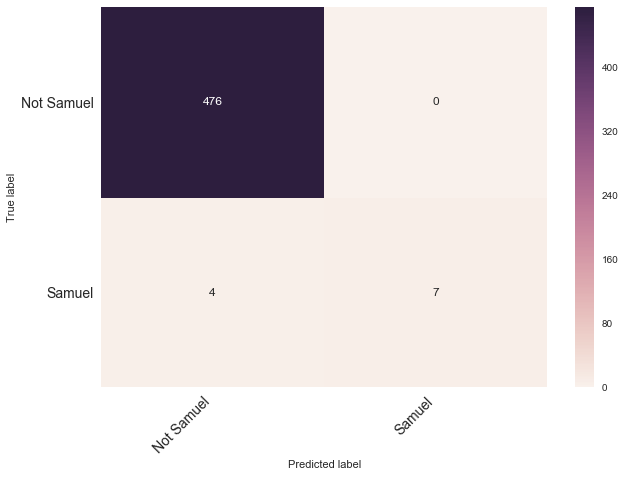

In [7]:
cm = confusion_matrix(y, predictions)
print_confusion_matrix(cm, ['Not Samuel','Samuel'])

In [7]:
accuracy_score(y, predictions)

0.9917864476386037